EDA for the datasets given:

### Importing Libraries
In this section, we import essential libraries for data manipulation and visualization:
- **Pandas**: For data handling and analysis.
- **NumPy**: For numerical operations.
- **Matplotlib**: For creating static, animated, and interactive visualizations.
- **Seaborn**: For statistical data visualization built on top of Matplotlib, providing a high-level interface for drawing attractive graphics.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data
Here, we load the training and testing datasets from Excel files into Pandas DataFrames. This step is crucial as it prepares the data for subsequent analysis and visualization.


In [3]:
train_data = pd.read_excel('train_data.xlsx')
test_data = pd.read_excel('test_data.xlsx')

### Combining Datasets
We concatenate the training and testing datasets into a single DataFrame called `data`. Each dataset is labeled with a new column called `dataset` to distinguish between training and testing records. This approach facilitates comprehensive analysis across both datasets.


In [4]:
data = pd.concat([train_data.assign(dataset='train'), test_data.assign(dataset='test')], axis=0)

### Initial Data Overview
This code displays the first few rows of the combined dataset to provide an overview of its structure and contents. It helps in understanding the types of data available for analysis, including customer IDs, transaction dates, credit scores, etc.


In [5]:

print("Initial Data Overview:")
print(data.head())

Initial Data Overview:
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0 

### Dataset Summary
The summary provides information about the dataset's shape, including the number of entries and data types for each column. This is essential for assessing data completeness and understanding variable types before analysis.


In [6]:

print("\nDataset Summary:")
print(data.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 122160 entries, 0 to 8454
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          122160 non-null  int64         
 1   transaction_date     122160 non-null  datetime64[ns]
 2   sub_grade            122160 non-null  object        
 3   term                 122160 non-null  object        
 4   home_ownership       122160 non-null  object        
 5   cibil_score          122160 non-null  int64         
 6   total_no_of_acc      122160 non-null  int64         
 7   annual_inc           122160 non-null  float64       
 8   int_rate             122160 non-null  float64       
 9   purpose              122160 non-null  object        
 10  loan_amnt            122160 non-null  int64         
 11  application_type     122160 non-null  object        
 12  installment          122160 non-null  float64       
 13  ver

### Checking for Missing Values
This section checks for any missing values in the dataset. Identifying missing values is vital as they can significantly impact the results of any analysis or modeling efforts. In this case, all columns show zero missing values, indicating a complete dataset.


In [7]:

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dataset                0
dtype: int64


In [8]:

print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
        customer_id               transaction_date    cibil_score  \
count  1.221600e+05                         122160  122160.000000   
mean   4.602978e+07  2015-04-03 02:10:20.275049216     684.529920   
min    3.476740e+05            2014-01-01 00:00:00     660.000000   
25%    2.751232e+07            2014-10-01 00:00:00     665.000000   
50%    4.759330e+07            2015-05-01 00:00:00     680.000000   
75%    6.407944e+07            2015-11-01 00:00:00     695.000000   
max    8.436346e+07            2016-06-01 00:00:00     845.000000   
std    2.142298e+07                            NaN      22.989021   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    122160.000000  1.221600e+05  122160.000000  122160.000000   
mean          0.274427  7.146152e+04      16.040654   15184.456655   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.350000    8000.000000   
50%

### Detailed Descriptive Statistics for Numerical Columns
This code segment computes additional statistics such as median, skewness, and kurtosis for all numerical columns in the dataset.
- **Median** provides a measure of central tendency that is less affected by outliers compared to the mean.
- **Skewness** indicates the asymmetry of the distribution (positive skew means a longer tail on the right).
- **Kurtosis** measures the "tailedness" of the distribution (high kurtosis indicates heavy tails).
These metrics are essential for understanding the distribution characteristics of our numerical data.


Descriptive Statistics:
                     count          mean           std        min          25%  \
customer_id      122160.0  4.602978e+07  2.142298e+07  347674.00  27512318.75   
cibil_score      122160.0  6.845299e+02  2.298902e+01     660.00       665.00   
total_no_of_acc  122160.0  2.744270e-01  6.482593e-01       0.00         0.00   
annual_inc       122160.0  7.146152e+04  5.993771e+04       0.00     43000.00   
int_rate         122160.0  1.604065e+01  3.307669e+00      12.05        13.35   
loan_amnt        122160.0  1.518446e+04  9.119421e+03    1000.00      8000.00   
installment      122160.0  4.565854e+02  2.708730e+02      33.24       266.06   
account_bal      122160.0  1.579585e+04  2.061522e+04       0.00      5625.00   
emp_length       122160.0  5.948944e+00  4.231240e+00       0.00         2.00   
loan_status      122160.0  7.319581e-01  4.429414e-01       0.00         0.00   

                         50%          75%          max       median  \
customer_id 

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


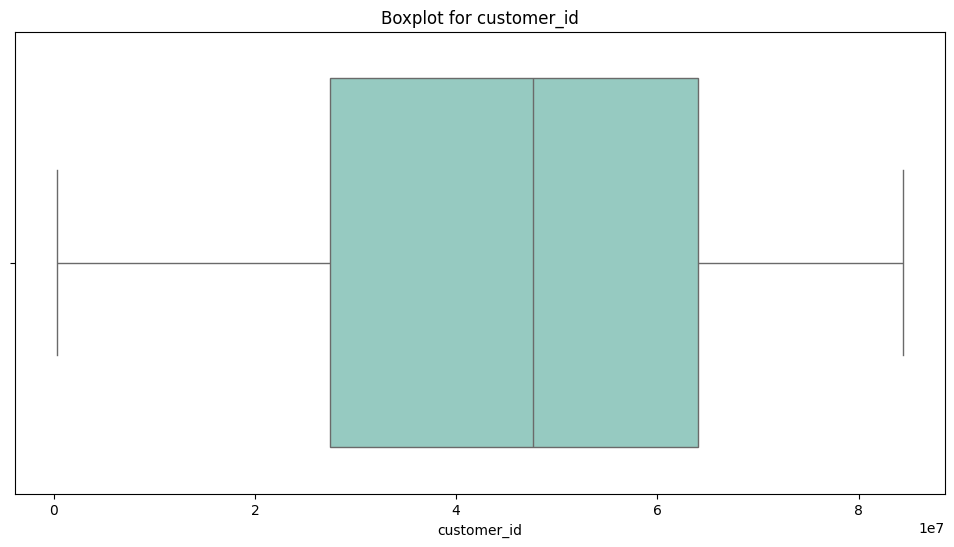

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


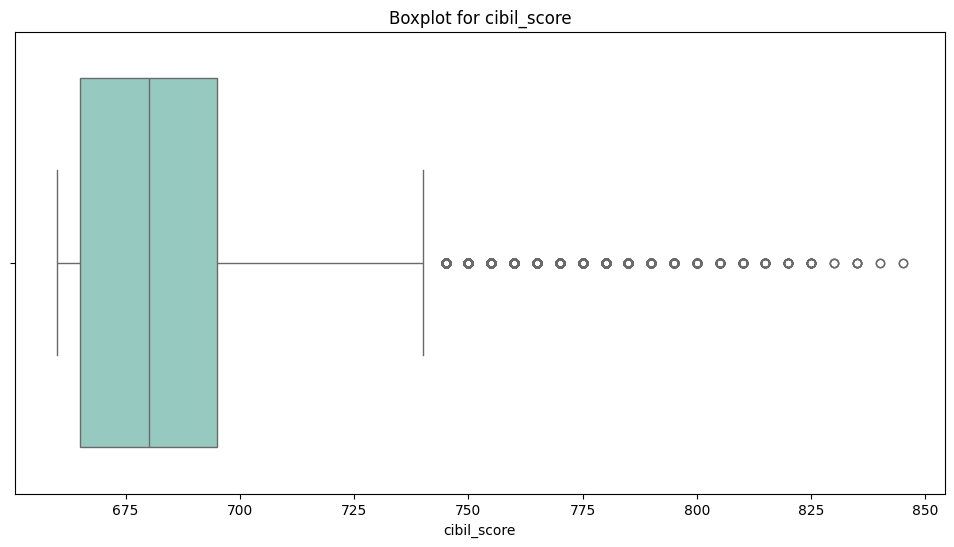

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


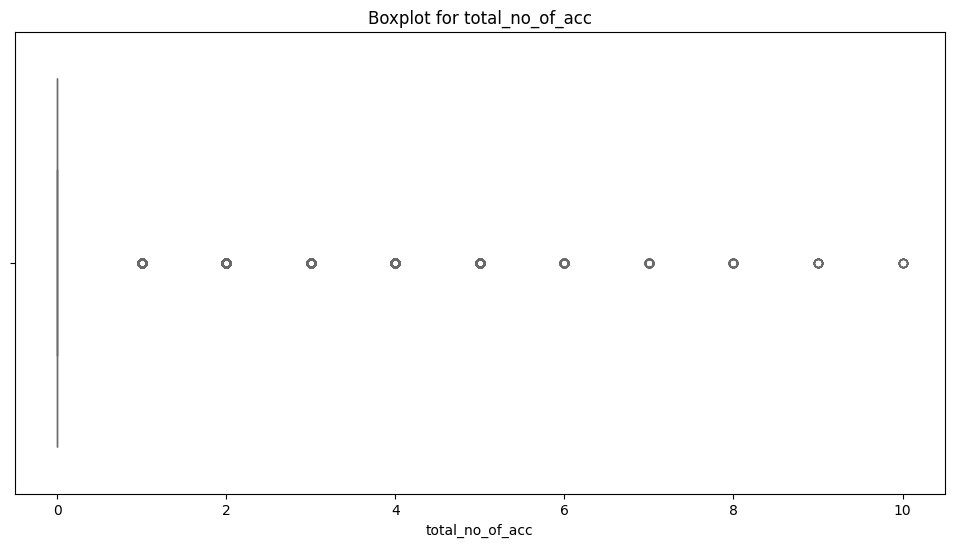

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


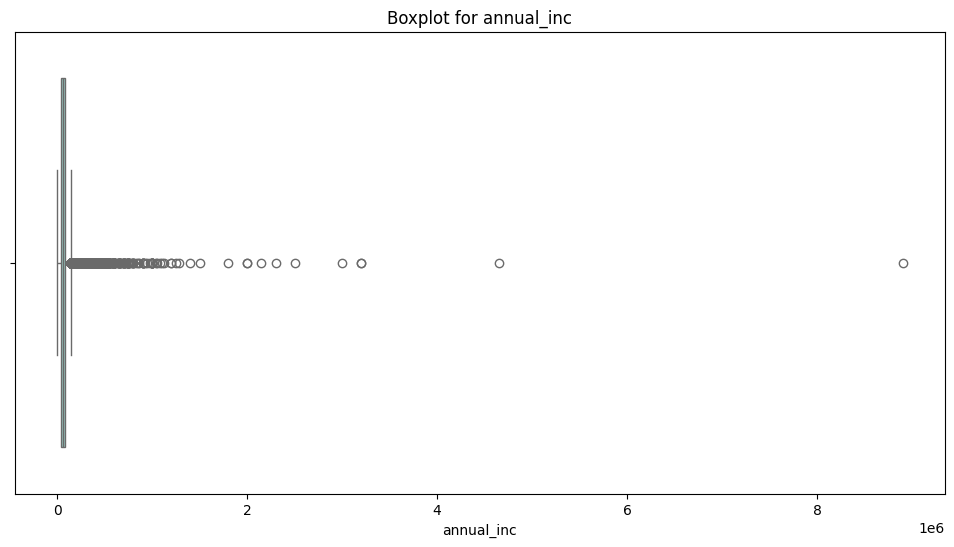

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


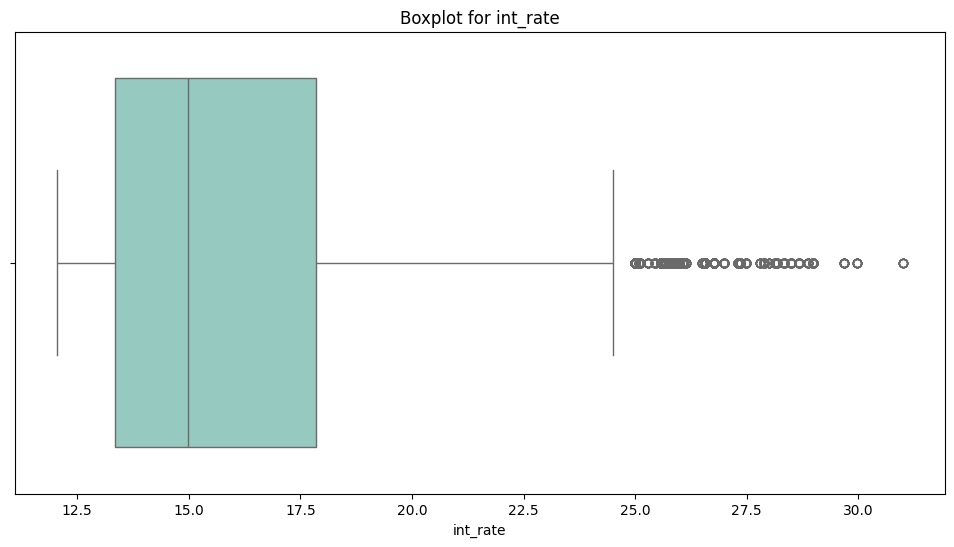

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


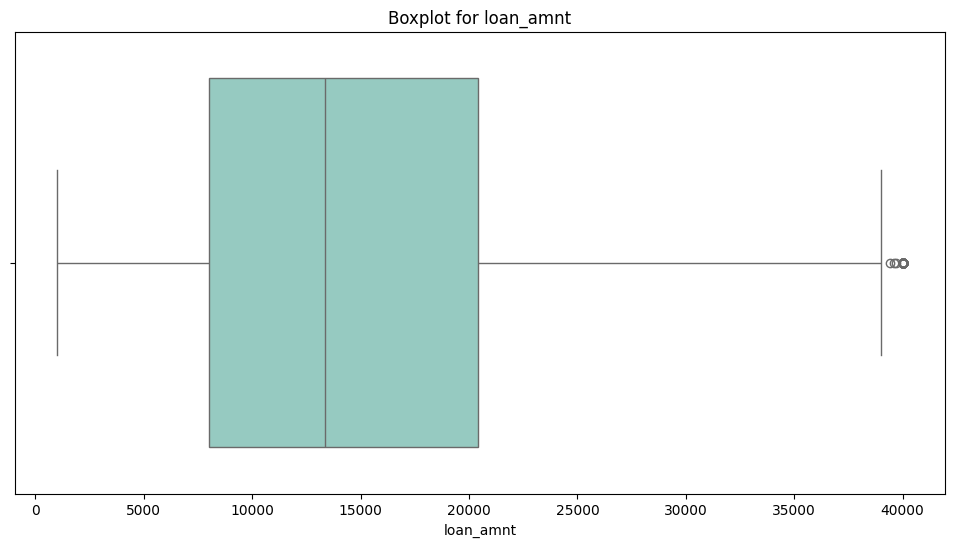

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


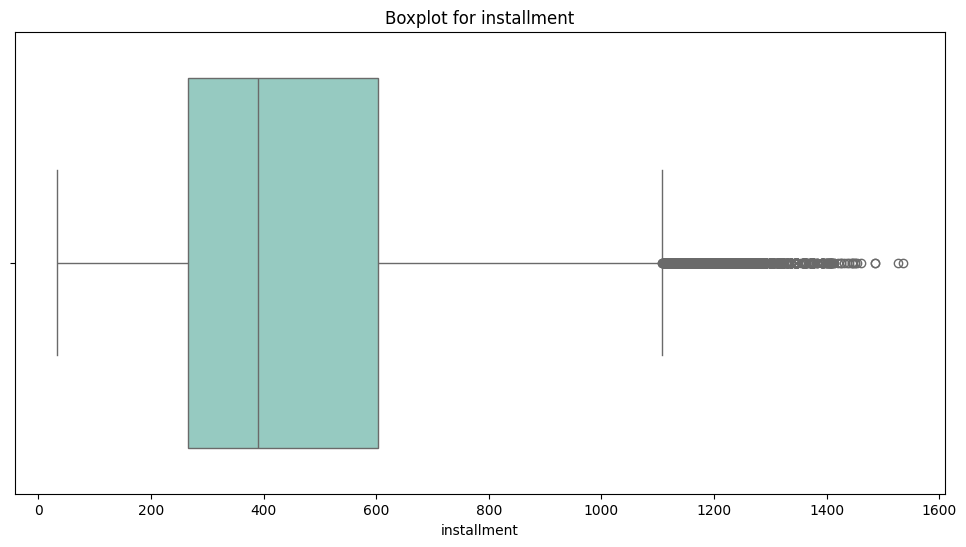

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


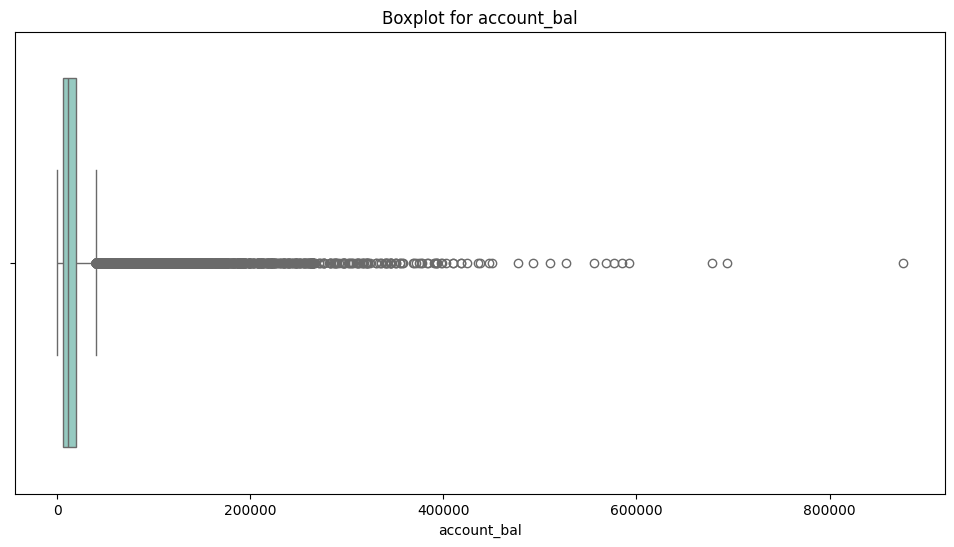

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


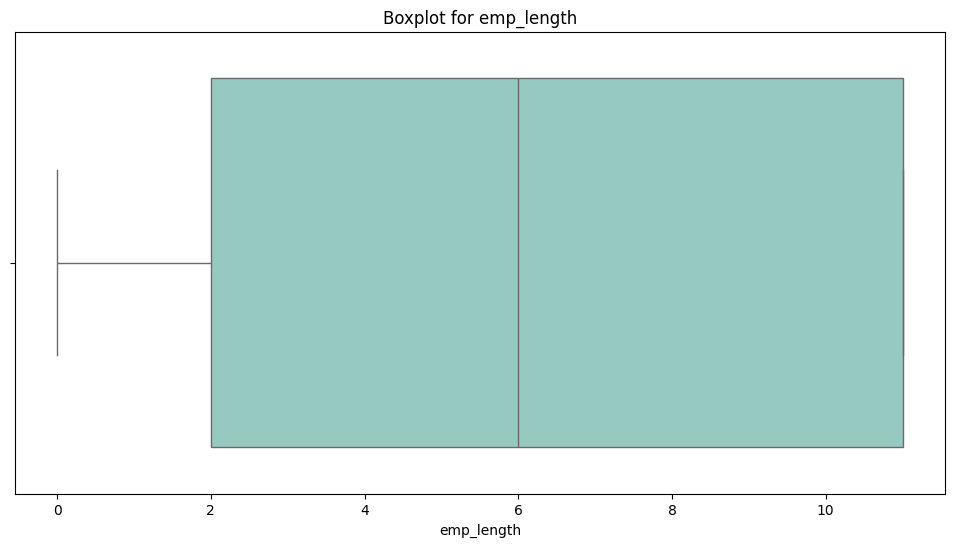

<ipython-input-24-b7fc253c8311>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Set3")


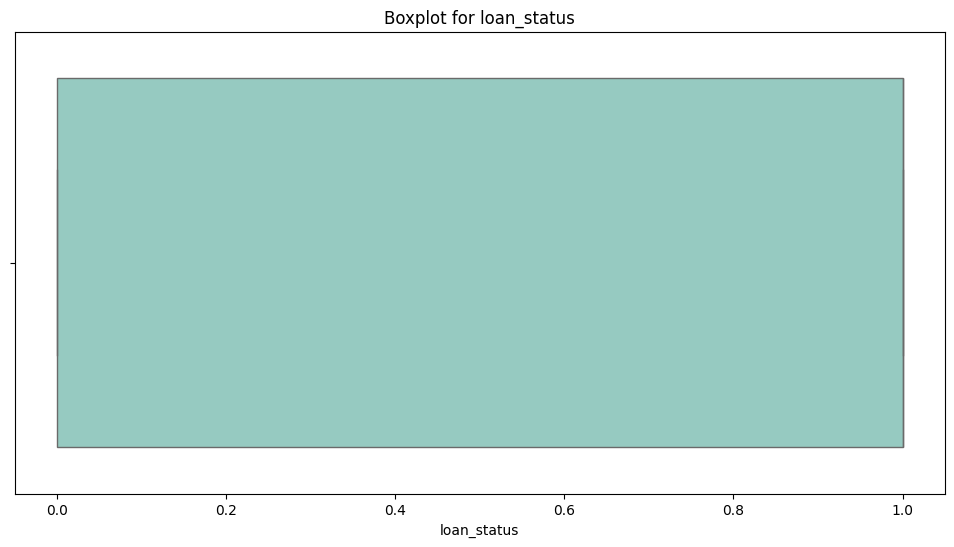

In [24]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns


desc_stats = data[numerical_cols].describe().T
desc_stats['median'] = data[numerical_cols].median()
desc_stats['skewness'] = data[numerical_cols].skew()
desc_stats['kurtosis'] = data[numerical_cols].kurt()
print("Descriptive Statistics:\n", desc_stats)

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=col, palette="Set3")
    plt.title(f"Boxplot for {col}")
    plt.show()


###Outlier Detection
Using Statistical Methods.This section demonstrates how to detect outliers in numerical data using two popular methods: Z-Score and Interquartile Range (IQR). Outliers are data points significantly deviating from the overall data distribution, and detecting them is essential for accurate analysis and modeling.

In [26]:
from scipy.stats import zscore

#Z-Score Method
z_scores = data[numerical_cols].apply(zscore)
outliers_zscore = (np.abs(z_scores) > 3).sum()
print("Outliers detected using Z-Score:\n", outliers_zscore)

#IQR Method
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f"IQR Outliers in {col}: {len(outliers_iqr)}")


Outliers detected using Z-Score:
 customer_id           0
cibil_score        2006
total_no_of_acc    1650
annual_inc          992
int_rate           1186
loan_amnt             0
installment         634
account_bal        1486
emp_length            0
loan_status           0
dtype: int64
IQR Outliers in customer_id: 0
IQR Outliers in cibil_score: 3073
IQR Outliers in total_no_of_acc: 25707
IQR Outliers in annual_inc: 6321
IQR Outliers in int_rate: 3260
IQR Outliers in loan_amnt: 105
IQR Outliers in installment: 4097
IQR Outliers in account_bal: 6967
IQR Outliers in emp_length: 0
IQR Outliers in loan_status: 0


### Target Variable Distribution Visualization
This segment visualizes the distribution of the target variable `loan_status` using a count plot. The plot illustrates how many loans were paid off versus those that defaulted:
- This distribution is critical for understanding class balance in the dataset.

Analyzing this distribution informs us about potential biases in modeling efforts and helps us decide if techniques like oversampling or undersampling are necessary to address class imbalance before training predictive models.


### Correlation Heatmap Visualization
This code segment computes and visualizes a correlation matrix for the cleaned training dataset using a heatmap. The heatmap displays pairwise correlations between numerical features:
- Values range from -1 to 1; closer to 1 indicates strong positive correlation, while closer to -1 indicates strong negative correlation.
- Annotations are included to provide exact correlation coefficients.

Understanding these correlations helps identify relationships between variables that may influence loan outcomes or borrower behavior, guiding feature selection for predictive modeling.


### Cleaning Training Data from Outliers
In this section, we apply the `remove_outliers` function to the training dataset to create a cleaned version (`train_data_cleaned`). The shape of both the original and cleaned datasets is printed to show how many rows were removed during outlier detection:
- **Before Outlier Removal**: Displays the original number of entries.
- **After Outlier Removal**: Shows how many entries remain after filtering out outliers.

This step is crucial to ensure that subsequent analyses are based on data that accurately represents typical borrower behavior without distortion from extreme values.


Boxplots for Train Data (Numerical Columns):


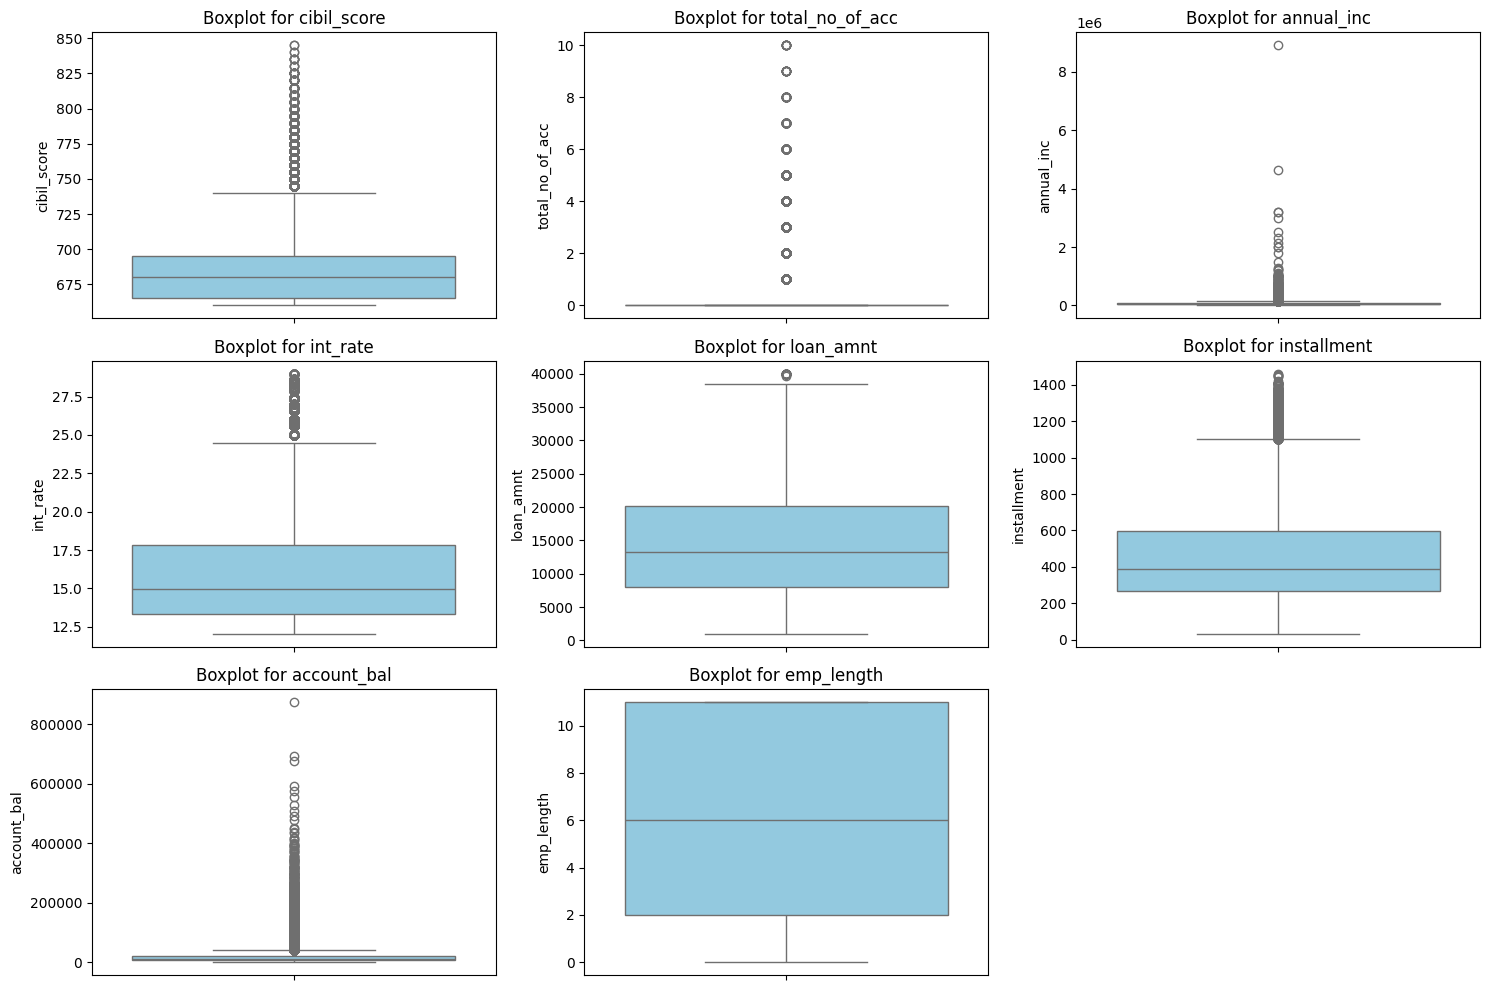


Data Shape Before Outlier Removal: (113705, 17)
Data Shape After Outlier Removal: (75256, 17)


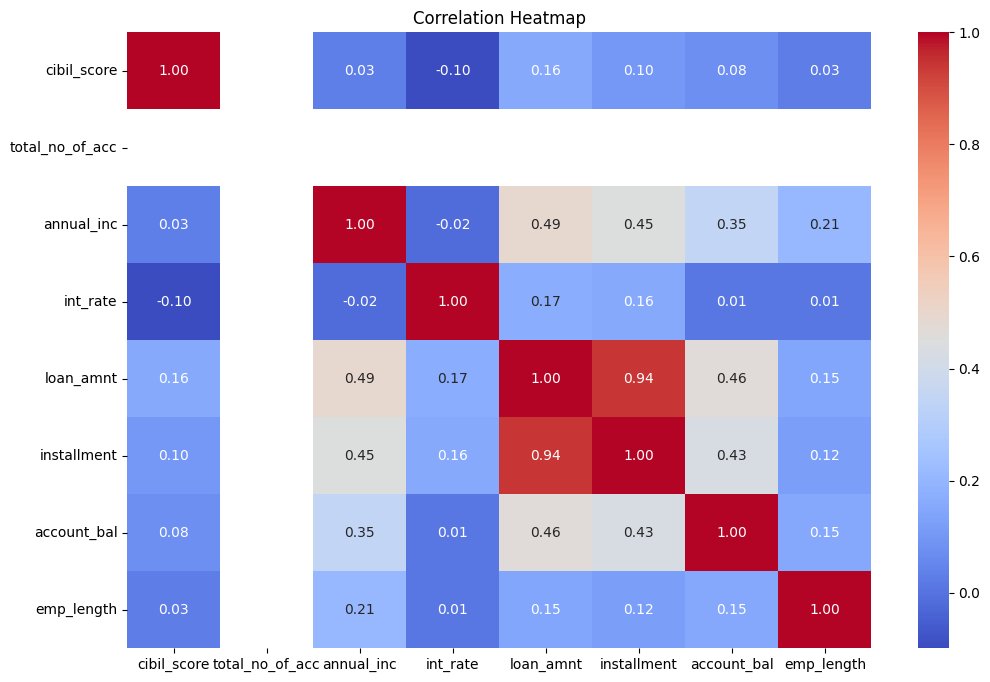

<ipython-input-28-d7d9b0b41450>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan_status", data=train_data_cleaned, palette="viridis")


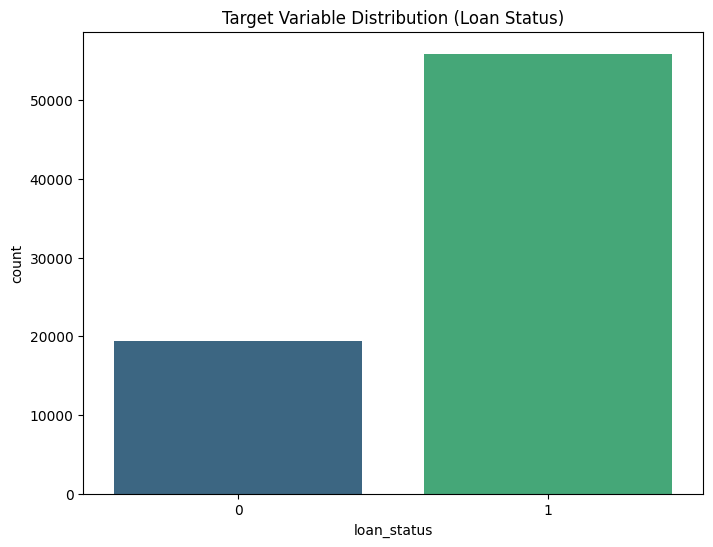

In [28]:
def visualize_boxplots(df, numerical_columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 3, i)
        sns.boxplot(y=df[col], color="skyblue")
        plt.title(f"Boxplot for {col}")
        plt.tight_layout()
    plt.show()

numerical_columns = [
    "cibil_score",
    "total_no_of_acc",
    "annual_inc",
    "int_rate",
    "loan_amnt",
    "installment",
    "account_bal",
    "emp_length",
]


print("Boxplots for Train Data (Numerical Columns):")
visualize_boxplots(train_data, numerical_columns)


def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


train_data_cleaned = remove_outliers(train_data, numerical_columns)


print("\nData Shape Before Outlier Removal:", train_data.shape)
print("Data Shape After Outlier Removal:", train_data_cleaned.shape)


plt.figure(figsize=(12, 8))
correlation_matrix = train_data_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x="loan_status", data=train_data_cleaned, palette="viridis")
plt.title("Target Variable Distribution (Loan Status)")
plt.show()


In [29]:
train_data_cleaned.to_csv("cleaned_train_data.csv", index=False)

### Target Variable Distribution Visualization
This code segment visualizes the distribution of the target variable `loan_status` using a bar plot. The plot displays the counts of loans categorized as either non-default (0) or default (1):
- **Loan Status**: The x-axis represents the loan status, where 0 indicates non-default and 1 indicates default.
- **Count**: The y-axis shows the number of loans in each category.

The use of distinct colors (skyblue for non-default and salmon for default) enhances visual clarity. This visualization is crucial for understanding class balance in the dataset, which can inform modeling strategies. A significant imbalance may require techniques such as oversampling, undersampling, or using specialized algorithms to ensure effective model training.


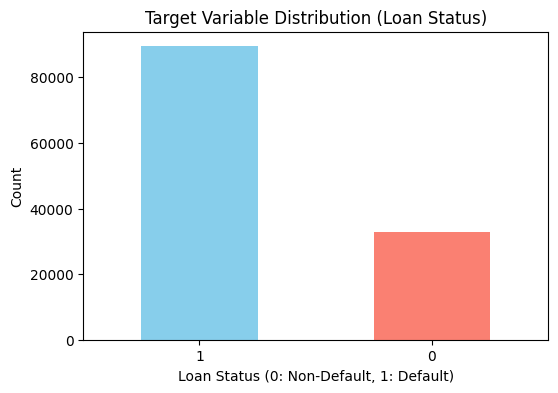

In [9]:

plt.figure(figsize=(6, 4))
data['loan_status'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution (Loan Status)')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [11]:

data.fillna(data.mean(numeric_only=True), inplace=True)
data.fillna('Unknown', inplace=True)

### Categorical Variable Distribution Visualization
In this section, we visualize the distribution of categorical variables in the dataset. The code iterates over all categorical columns identified in the DataFrame and generates count plots for each one, with the `loan_status` variable used as a hue to differentiate between non-default (0) and default (1) loans:
- **Count Plots**: Each plot displays the frequency of each category within the categorical variable, allowing us to see how loan status varies across different categories.
- **Hue Parameter**: By using `hue='loan_status'`, we can observe how different categories relate to loan outcomes, which is critical for understanding potential factors influencing defaults.

This analysis helps identify patterns or trends in categorical features that may affect loan performance and informs feature selection for predictive modeling. For instance, if a particular category shows a high proportion of defaults, it may warrant further investigation or special consideration in model training.


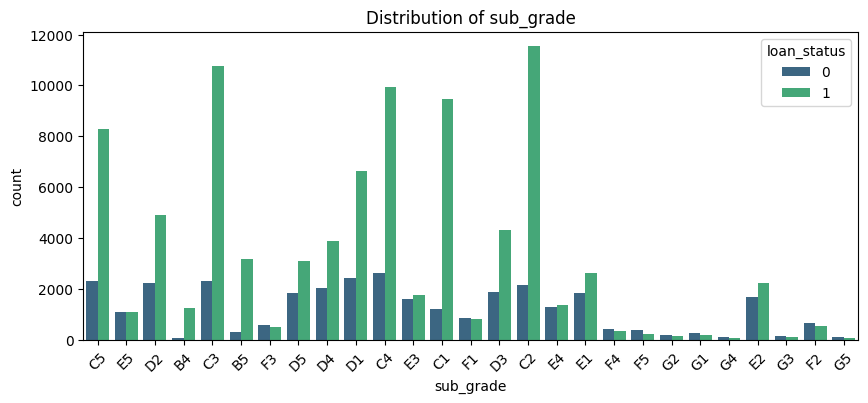

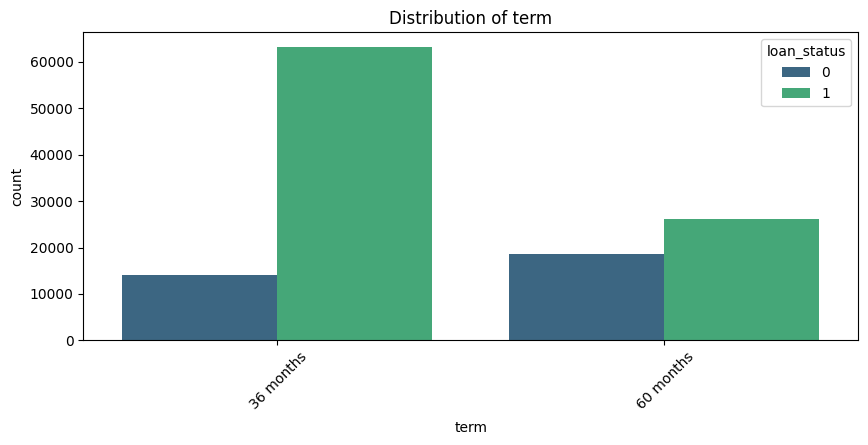

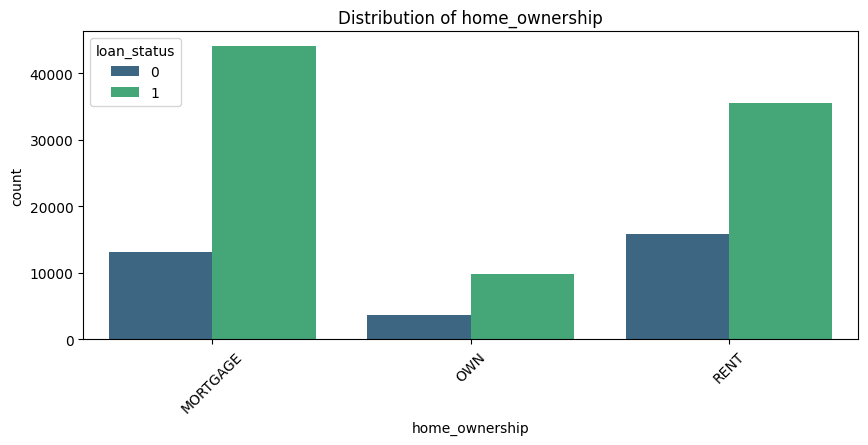

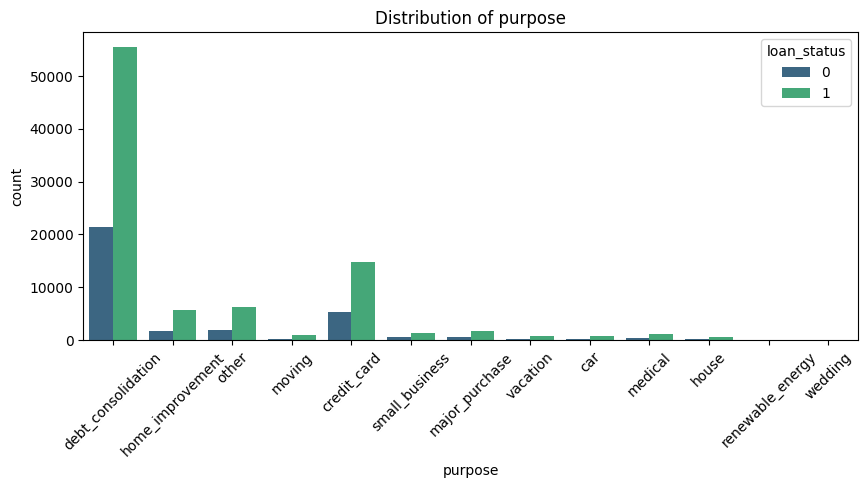

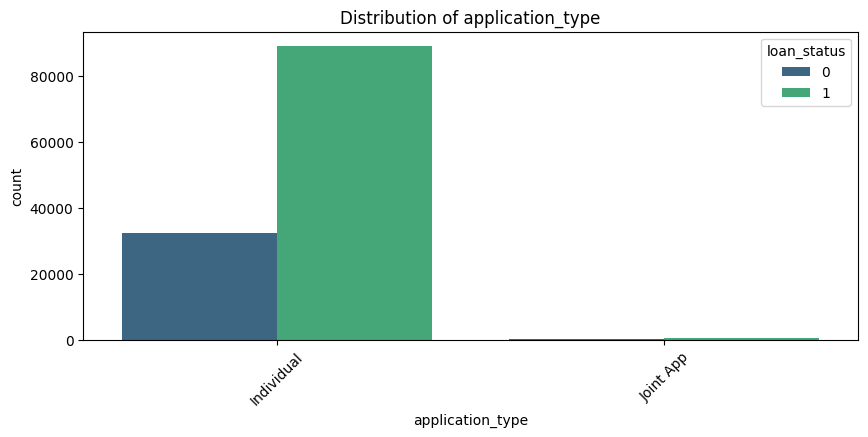

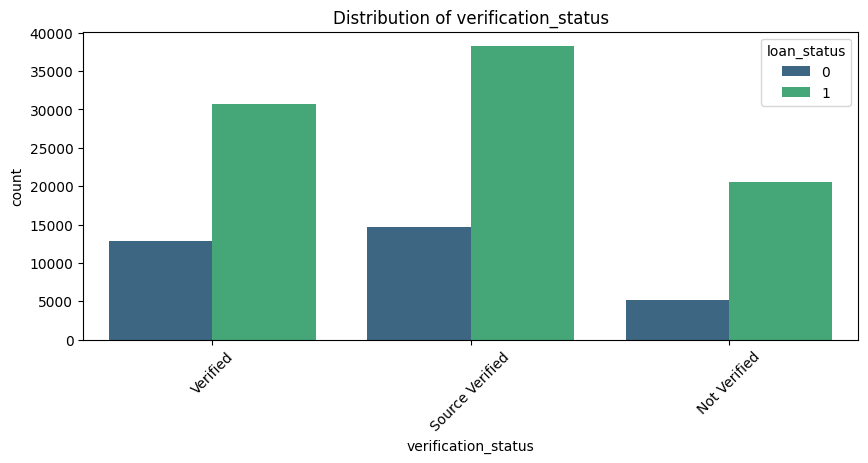

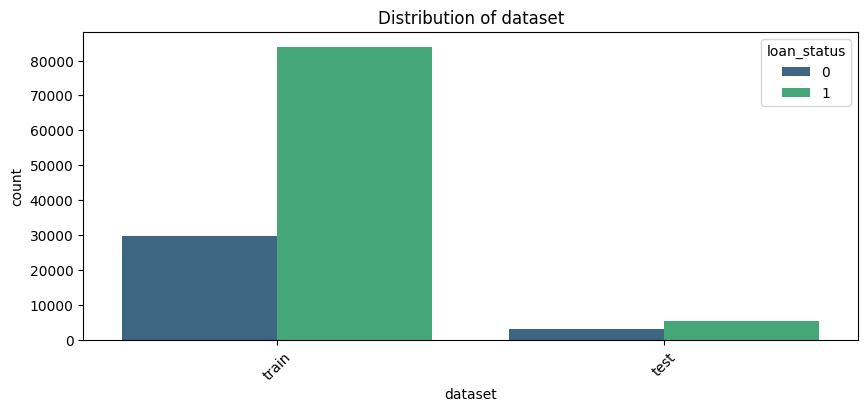

In [12]:

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, hue='loan_status', palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


### Distribution of Numerical Variables by Loan Status
In this section, we visualize the distribution of numerical variables in the dataset, excluding the target variable `loan_status`. For each numerical column, we create a histogram overlaid with a kernel density estimate (KDE) to illustrate the distribution shape:
- **Histograms**: The x-axis represents the values of the numerical variable, while the y-axis shows the frequency of those values.
- **Hue Parameter**: The `hue='loan_status'` parameter allows us to differentiate between non-default (0) and default (1) loans within each histogram. This differentiation is crucial for understanding how the distribution of each numerical feature correlates with loan outcomes.

The inclusion of KDE helps visualize the probability density function of the variable, providing insights into its distribution characteristics. Analyzing these distributions can reveal patterns or trends that may influence loan performance and inform feature selection for predictive modeling. For example, if certain ranges of a numerical feature show a higher concentration of defaults, this could indicate a risk factor worth considering in future analyses.


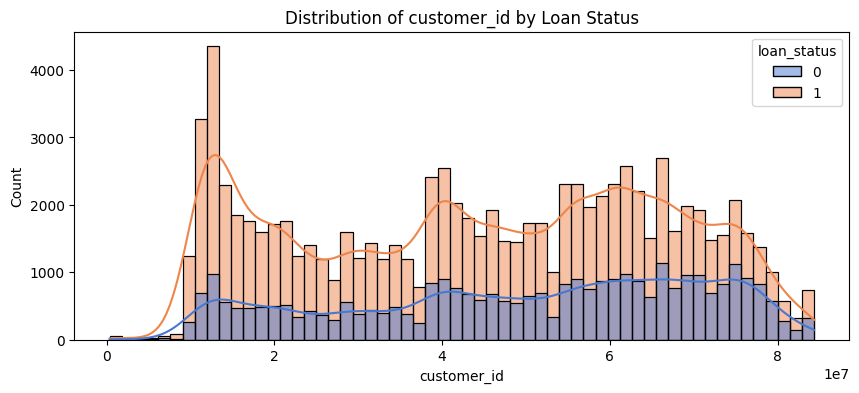

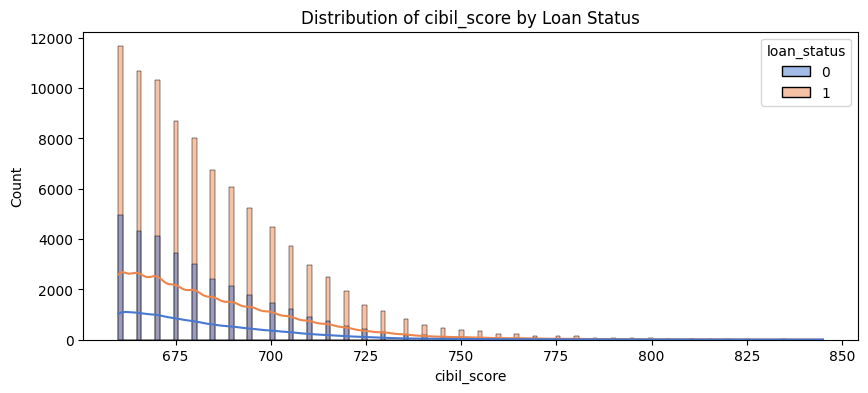

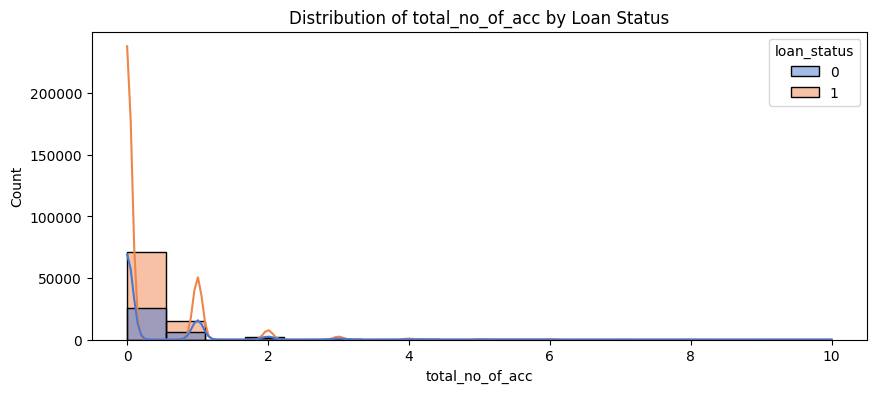

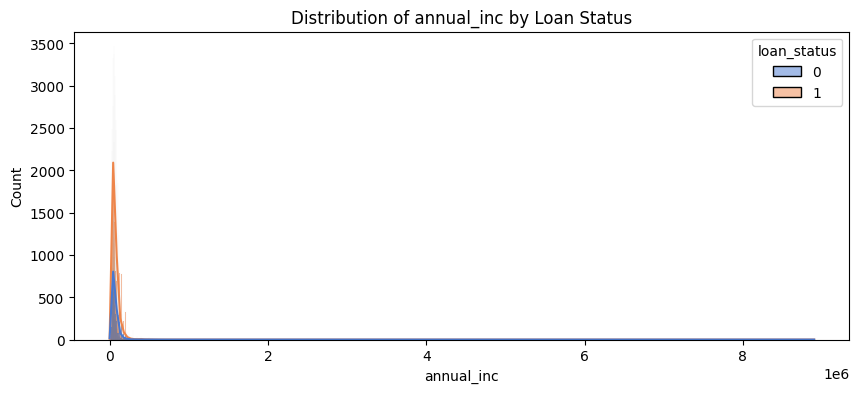

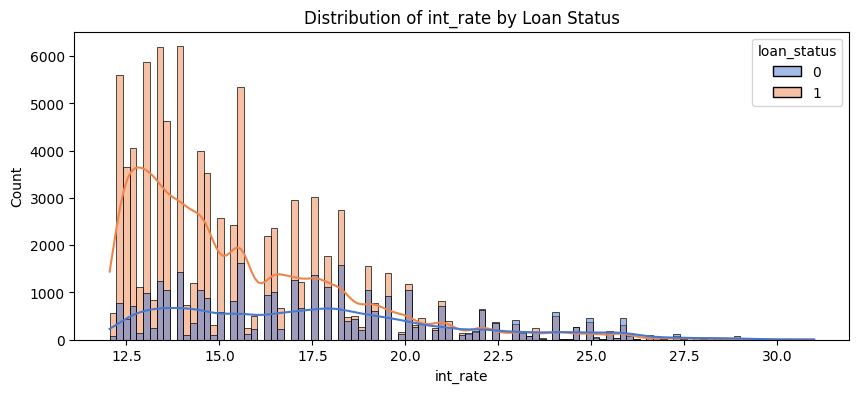

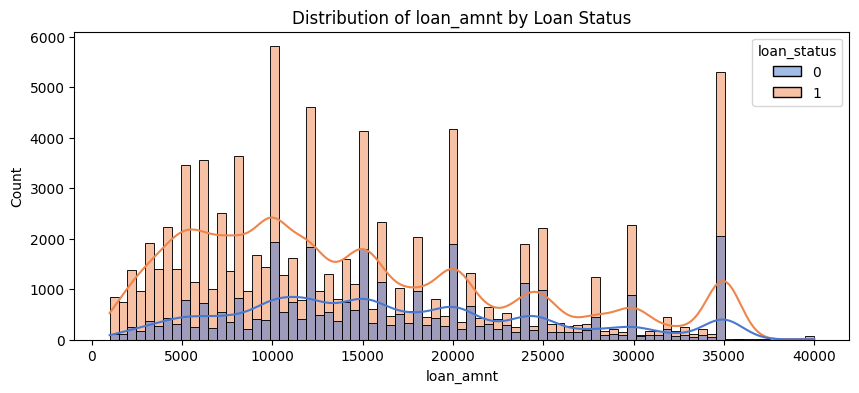

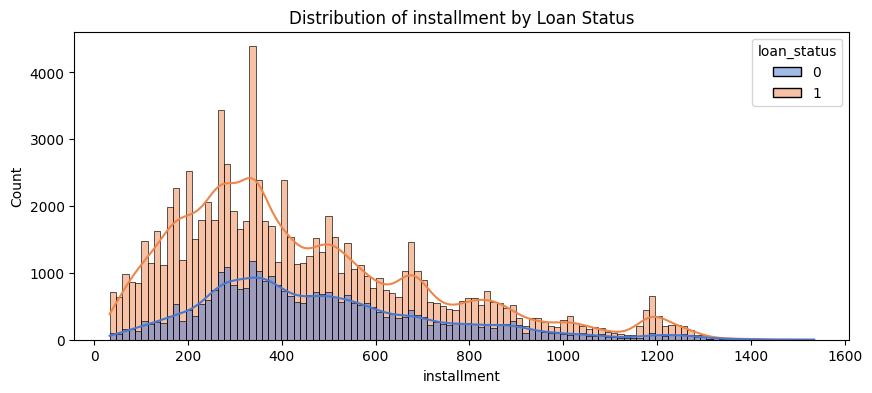

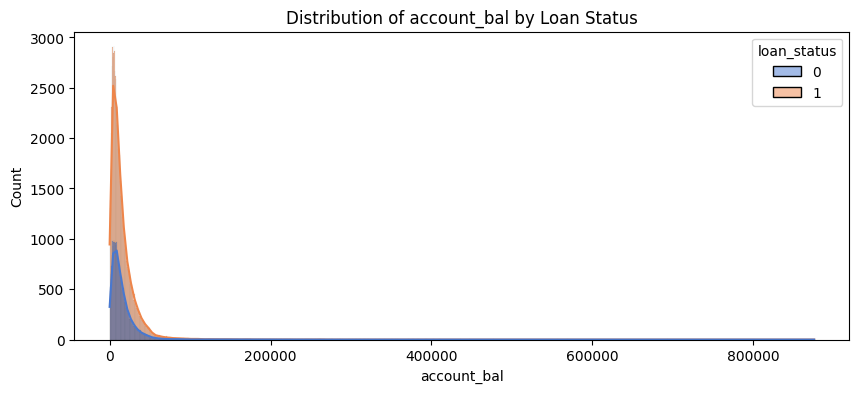

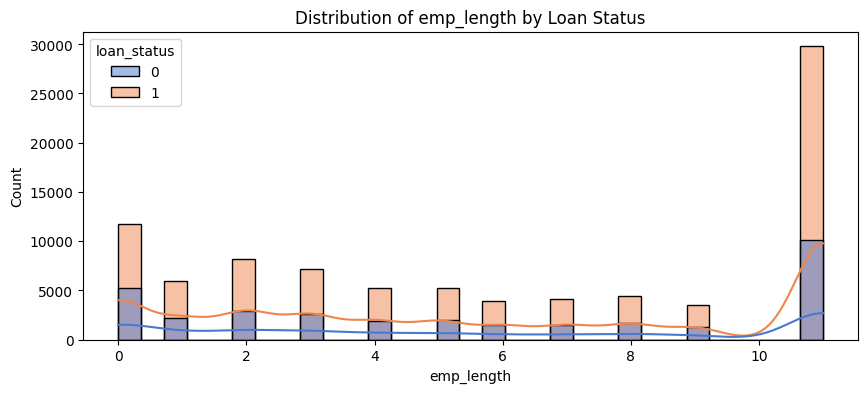

In [13]:

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('loan_status')
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=col, hue='loan_status', kde=True, palette='muted')
    plt.title(f'Distribution of {col} by Loan Status')
    plt.show()

### Correlation Matrix of Numerical Features
This code segment computes and visualizes the correlation matrix for numerical features in the dataset. The steps involved are as follows:
- **Numerical Data Selection**: We select all columns with numerical data types (both integers and floats) from the DataFrame.
- **Correlation Calculation**: The correlation matrix is computed using the `.corr()` method, which calculates pairwise correlation coefficients between numerical features.
- **Heatmap Visualization**: A heatmap is generated using Seaborn's `heatmap` function, which visually represents the correlation coefficients. The `annot=True` parameter displays the correlation values on the heatmap, while `cmap='coolwarm'` provides a color gradient to indicate the strength and direction of correlations.

The resulting heatmap allows us to quickly identify relationships between numerical features:
- **Strong Positive Correlation**: Values close to 1 indicate a strong positive relationship (e.g., as one feature increases, so does the other).
- **Strong Negative Correlation**: Values close to -1 indicate a strong negative relationship (e.g., as one feature increases, the other decreases).
- **Weak or No Correlation**: Values near 0 suggest little to no linear relationship.

Understanding these correlations is crucial for feature selection and engineering in predictive modeling. For instance, highly correlated features may lead to multicollinearity issues in regression models, necessitating careful consideration of which features to include.


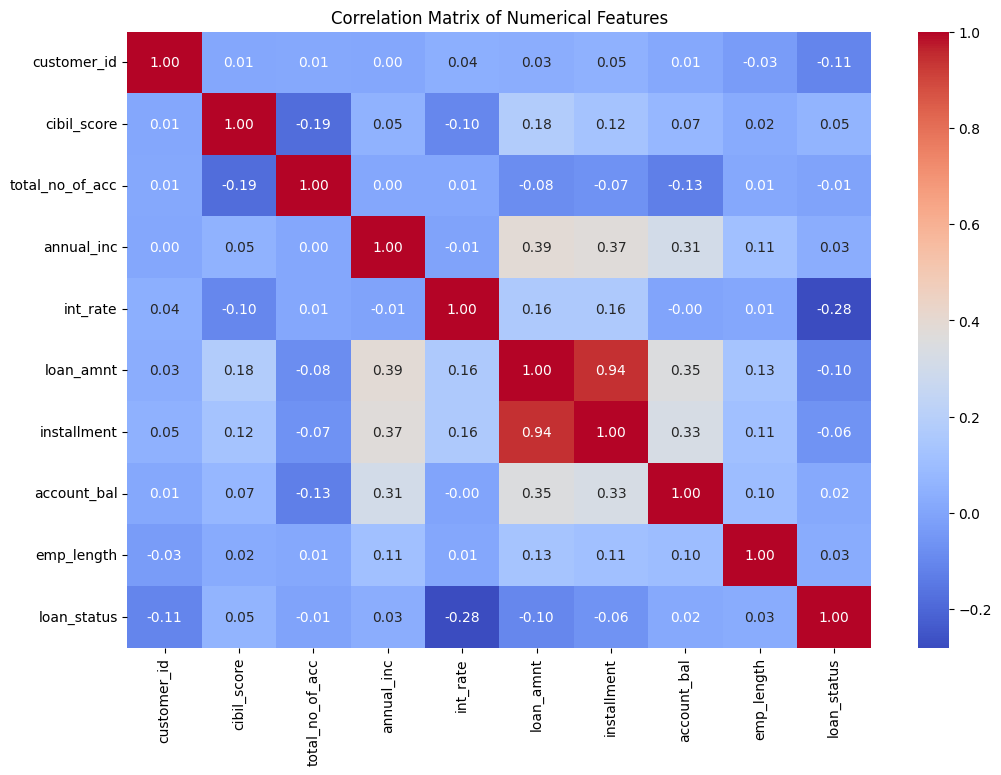

In [17]:

plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Boxplot Visualization of Numerical Features by Loan Status
In this section, we create boxplots for each numerical feature in the dataset, comparing their distributions against the target variable `loan_status`. The boxplots provide a visual representation of the central tendency and variability of each numerical feature for both loan statuses (0: Non-Default and 1: Default):
- **Boxplots**: The x-axis represents the loan status, while the y-axis shows the values of the numerical feature being analyzed. Each box represents the interquartile range (IQR), with the line inside the box indicating the median. Whiskers extend to show the range of the data, while any points outside this range are considered outliers.
  
This visualization is crucial for identifying how each numerical feature relates to loan outcomes. For instance:
- **Differences in Medians**: A noticeable difference in medians between non-default and default categories may suggest that a particular feature is a strong predictor of loan status.
- **Outliers**: The presence of outliers can indicate extreme cases that may warrant further investigation.

By examining these relationships, we can gain insights into which numerical features may significantly influence loan defaults and should be prioritized in predictive modeling efforts.


<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


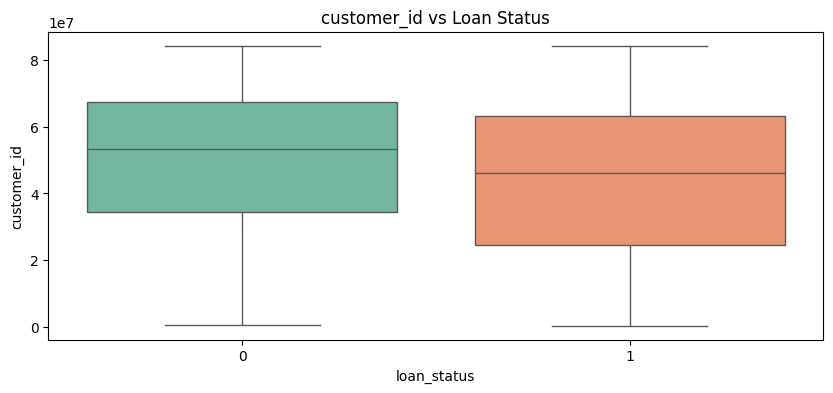

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


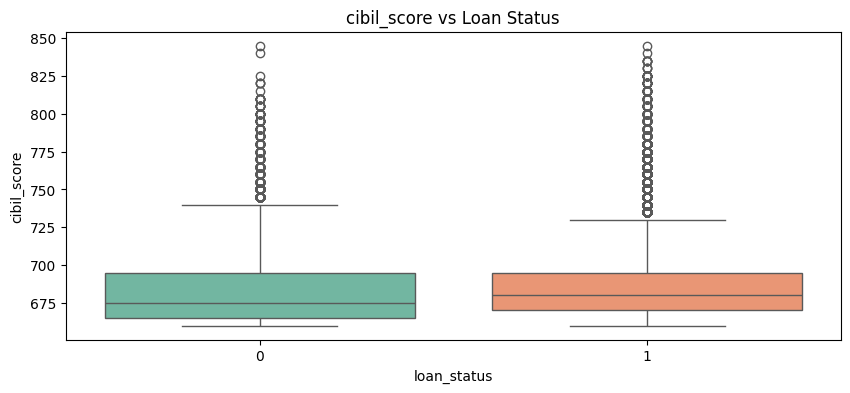

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


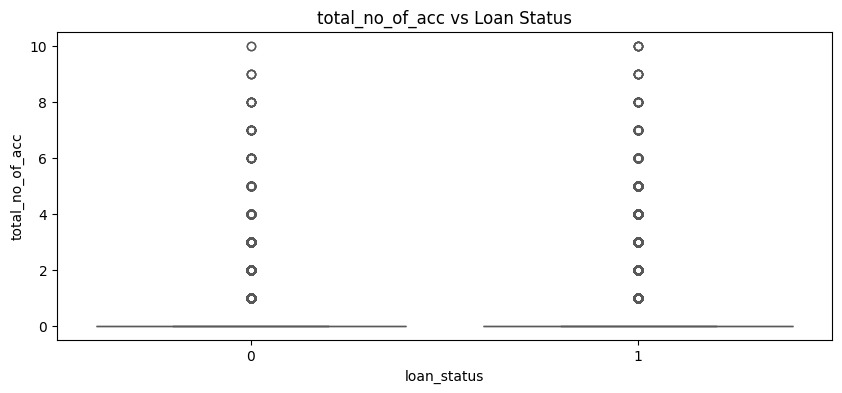

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


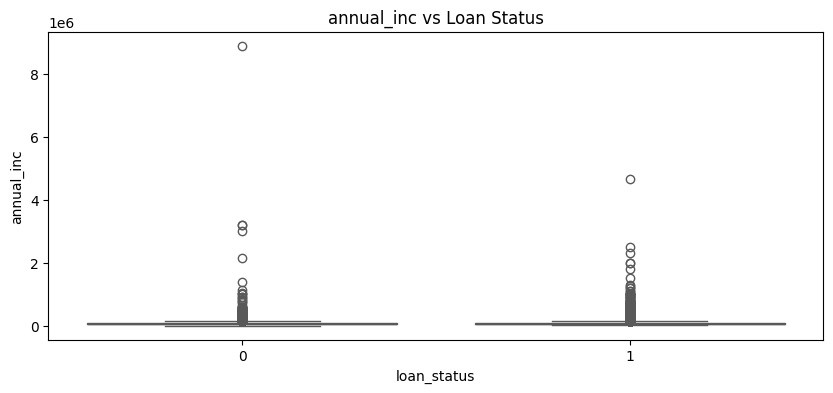

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


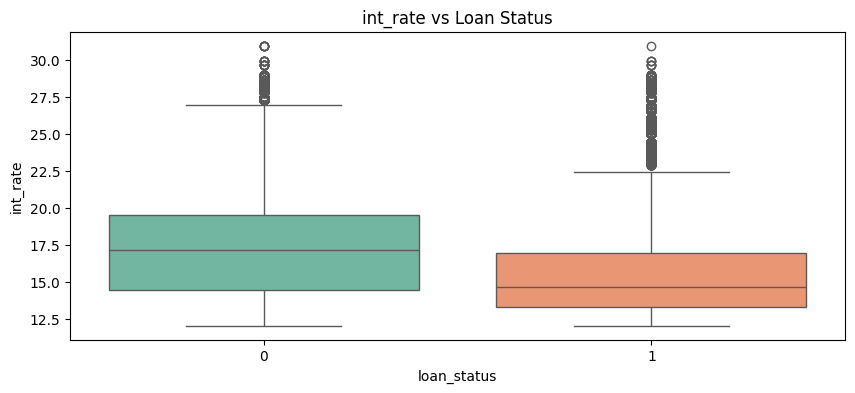

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


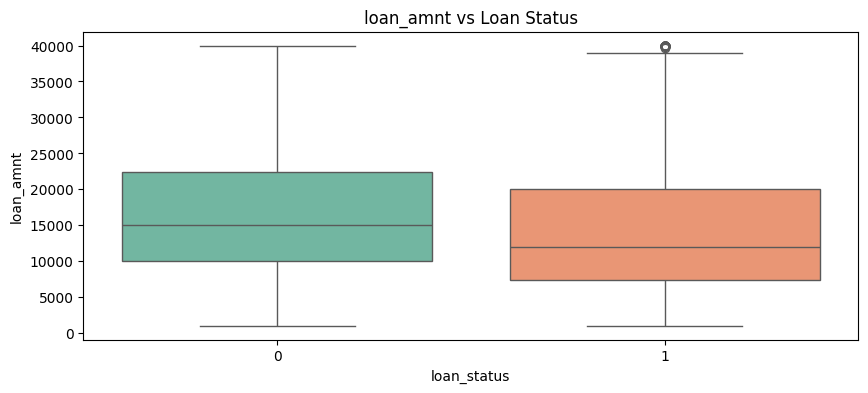

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


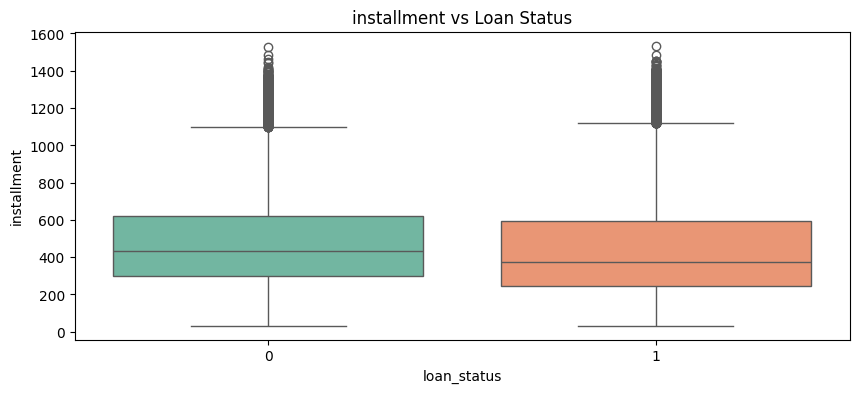

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


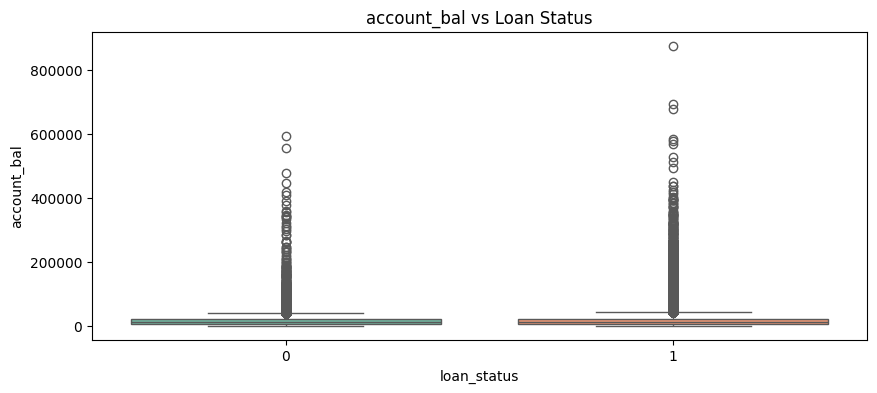

<ipython-input-18-efe83bbe2ad4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')


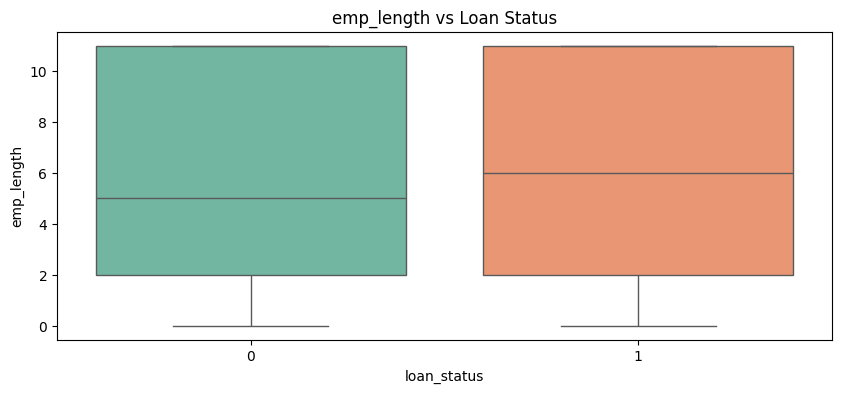

In [18]:
# Feature relationships with the target variable
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data, x='loan_status', y=col, palette='Set2')
    plt.title(f'{col} vs Loan Status')
    plt.show()

### Pairplot of Key Features
In this section, we create a pairplot for a selected subset of features in the dataset, focusing on their relationships with each other and the target variable `loan_status`. The selected features include:
- **Cibil Score**: A measure of creditworthiness.
- **Annual Income**: The yearly income of the borrower.
- **Loan Amount**: The total amount of the loan taken.
- **Interest Rate**: The rate at which interest is charged on the loan.

The pairplot visualizes pairwise relationships between these features:
- **Hue Parameter**: The `hue='loan_status'` parameter differentiates the data points based on loan status (0 for non-default and 1 for default), allowing us to observe how these features interact with loan outcomes.
- **Scatter Plots**: Each cell in the pairplot shows scatter plots for feature pairs, providing insights into their correlations and potential trends.
- **Diagonal Histograms**: The diagonal displays histograms for each feature, showing their distributions.

This visualization is crucial for identifying patterns or clusters within the data that may indicate how different features relate to loan defaults. For example, we might observe that lower cibil scores and higher loan amounts correlate with a higher likelihood of defaulting on loans. Such insights can inform feature selection and engineering strategies in subsequent modeling efforts.


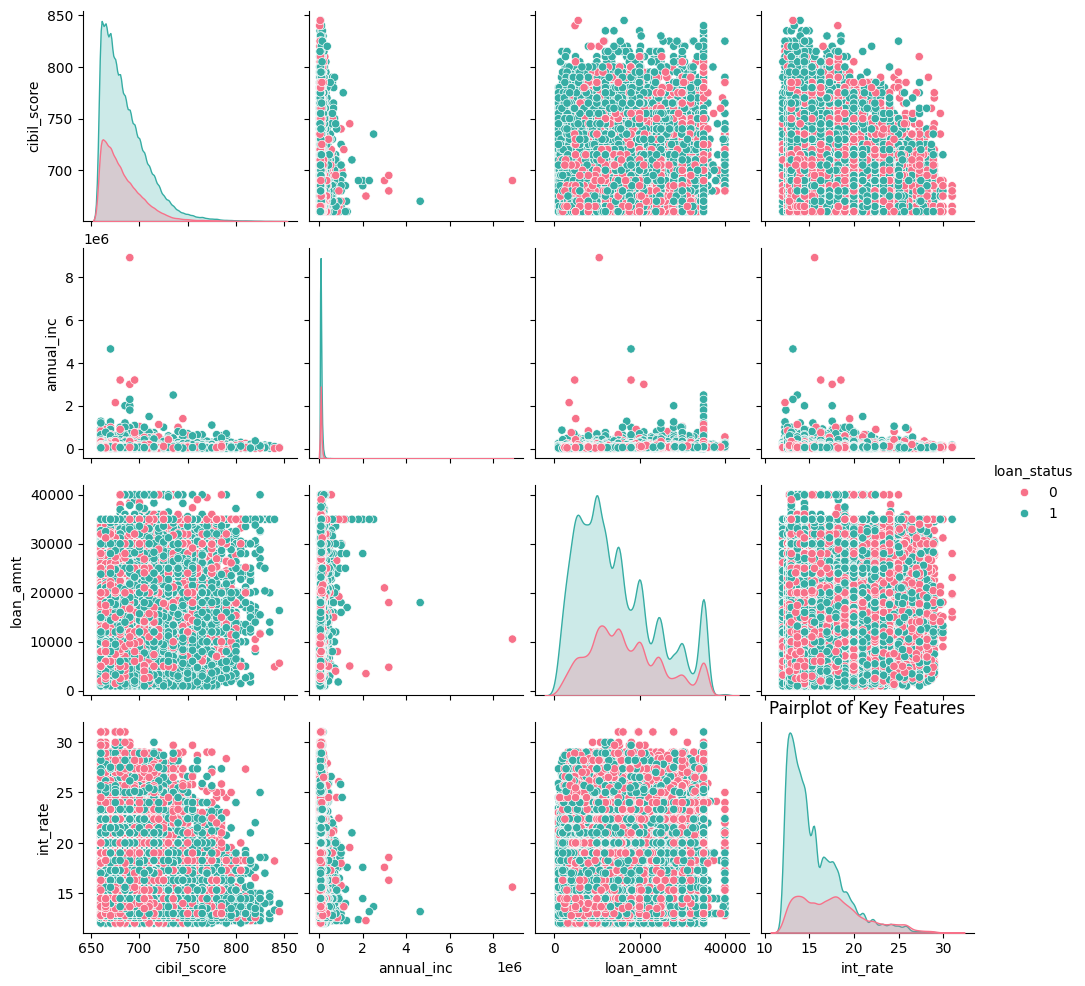

In [19]:

subset_features = ['cibil_score', 'annual_inc', 'loan_amnt', 'int_rate', 'loan_status']
sns.pairplot(data[subset_features], hue='loan_status', palette='husl')
plt.title('Pairplot of Key Features')
plt.show()

anyything additon can be made to enhance it more and make it standout yet staying releveant to the porblem statement pdf given


### Default Rate by Employment Length
This code segment visualizes the relationship between employment length and the default rate of loans using a bar plot. The steps involved are as follows:
- **Bar Plot**: The x-axis represents the length of employment (in years), while the y-axis shows the average loan status, where 0 indicates non-default and 1 indicates default. This plot effectively summarizes how employment length correlates with loan default rates.
- **Palette**: The `palette='mako'` parameter is used to apply a specific color scheme to the bars, enhancing visual appeal.
- **Confidence Interval**: The `ci=None` parameter disables the display of confidence intervals around the mean estimates, focusing solely on the average default rate.

This visualization is crucial for understanding how employment stability may influence loan repayment behavior. For instance, we might observe that borrowers with longer employment lengths tend to have lower default rates, suggesting that job stability could be a significant factor in assessing credit risk. Such insights can inform lending strategies and risk assessment models by highlighting the importance of employment history in predicting loan outcomes.


<ipython-input-20-73929f4667cf>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='emp_length', y='loan_status', palette='mako', ci=None)
<ipython-input-20-73929f4667cf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='emp_length', y='loan_status', palette='mako', ci=None)


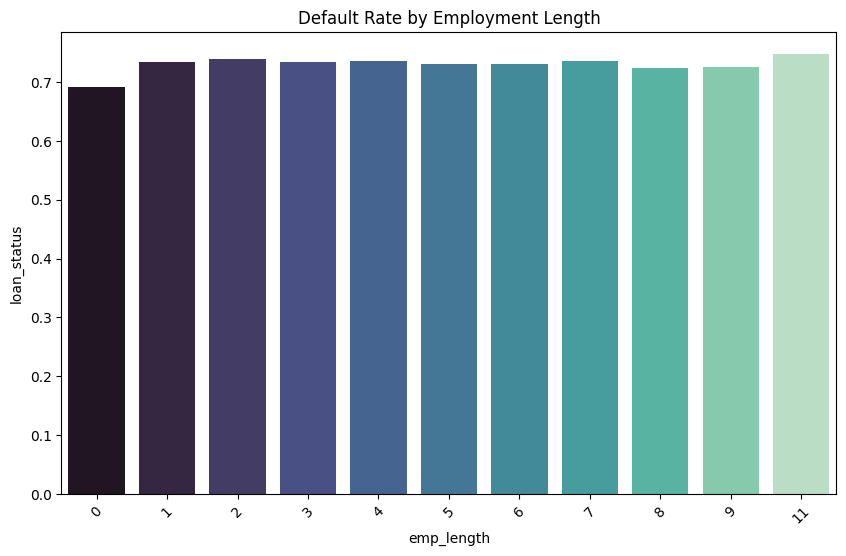

In [20]:

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='emp_length', y='loan_status', palette='mako', ci=None)
plt.title('Default Rate by Employment Length')
plt.xticks(rotation=45)
plt.show()

### Interest Rate Distribution by Loan Status
In this section, we visualize the distribution of interest rates (`int_rate`) based on loan status using a violin plot. The key features of this visualization include:
- **Violin Plot**: The x-axis represents the loan status (0 for non-default and 1 for default), while the y-axis shows the interest rates. The shape of each "violin" indicates the distribution of interest rates for each loan status category.
- **Density Representation**: The width of the violin at different levels indicates the density of data points at those interest rate values. Wider sections represent a higher concentration of loans with that interest rate.
- **Median and Quartiles**: The plot also typically includes markers for the median and interquartile range, providing insights into the central tendency and variability of interest rates for each loan status.

This visualization is crucial for understanding how interest rates differ between defaulting and non-defaulting loans. For example, if we observe that loans with higher interest rates are more likely to default, this could indicate a risk factor that lenders should consider when assessing loan applications. Analyzing these distributions helps inform lending policies and risk management strategies.


<ipython-input-21-1ab7fadd7113>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='loan_status', y='int_rate', palette='muted')


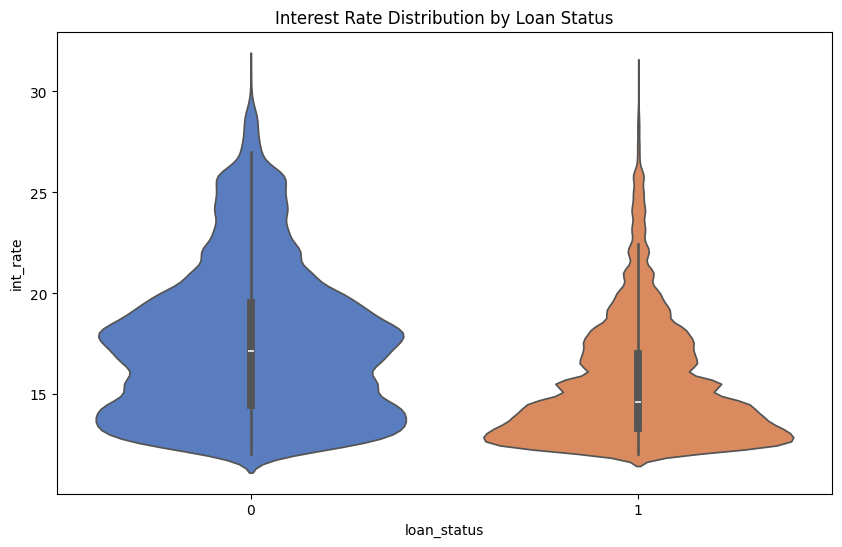

In [21]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='loan_status', y='int_rate', palette='muted')
plt.title('Interest Rate Distribution by Loan Status')
plt.show()

### Loan Amount Distribution by Term and Loan Status
In this section, we visualize the distribution of loan amounts (`loan_amnt`) based on the loan term (`term`) and loan status using a boxplot. The key features of this visualization include:
- **Boxplot**: The x-axis represents the loan term (e.g., 36 months or 60 months), while the y-axis shows the loan amounts. The boxplots illustrate the median, quartiles, and potential outliers for each term category.
- **Hue Parameter**: By using `hue='loan_status'`, we differentiate between non-default (0) and default (1) loans within each term category. This allows us to observe how loan amounts vary with respect to both term length and loan status.

This visualization is crucial for understanding how the terms of loans relate to their amounts and default rates. For instance, if we notice that loans with longer terms tend to have higher amounts and a higher proportion of defaults, this could indicate a risk factor that lenders should consider when assessing loan applications.


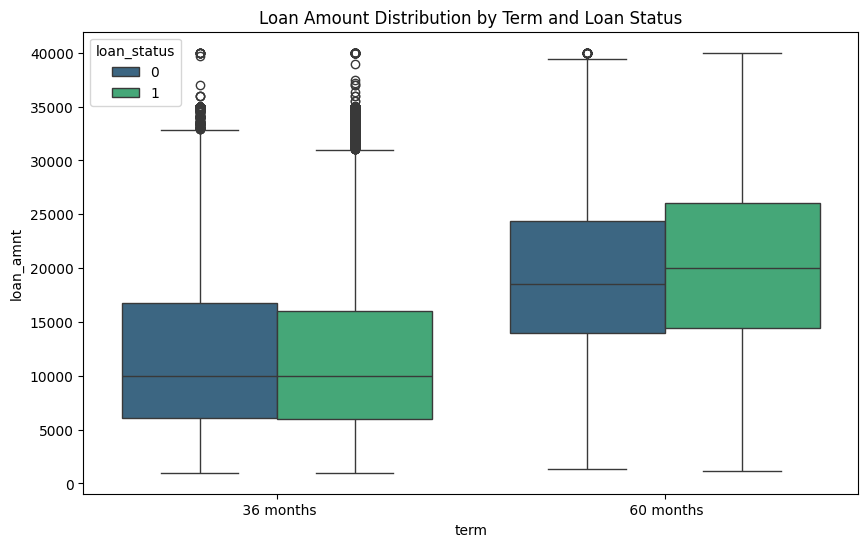

<ipython-input-23-64af1300449c>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='purpose', y='loan_amnt', hue='loan_status', palette='Set3', ci=None)


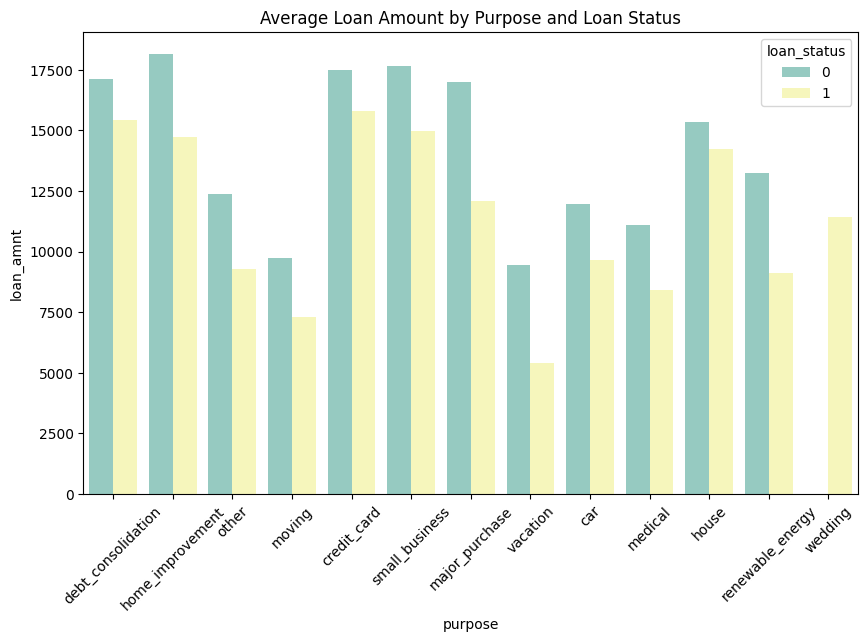

In [23]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='term', y='loan_amnt', hue='loan_status', palette='viridis')
plt.title('Loan Amount Distribution by Term and Loan Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='purpose', y='loan_amnt', hue='loan_status', palette='Set3', ci=None)
plt.title('Average Loan Amount by Purpose and Loan Status')
plt.xticks(rotation=45)
plt.show()

### Monthly Default Rate Visualization
In this section, we analyze the monthly default rate of loans over time. The key steps involved in this visualization are as follows:
- **Date Conversion**: The `transaction_date` column is converted to a datetime format using `pd.to_datetime()`, allowing for easier manipulation and analysis of date-related data.
- **Year-Month Extraction**: A new column, `year_month`, is created by extracting the year and month from the `transaction_date`. This transformation facilitates grouping the data by month.
- **Monthly Default Rate Calculation**: The monthly default rate is computed by grouping the data by `year_month` and calculating the mean of the `loan_status` column. This mean represents the proportion of loans that defaulted in each month.
- **Line Plot Visualization**: A line plot is generated to visualize the monthly default rates, with markers indicating individual data points for clarity.

This visualization is crucial for identifying trends in loan defaults over time. For instance, if we observe an increasing trend in the default rate during certain months, it may prompt further investigation into external factors influencing borrower behavior during those periods (e.g., economic downturns, seasonal employment variations). Understanding these trends can help lenders adjust their risk assessment strategies and lending practices accordingly.


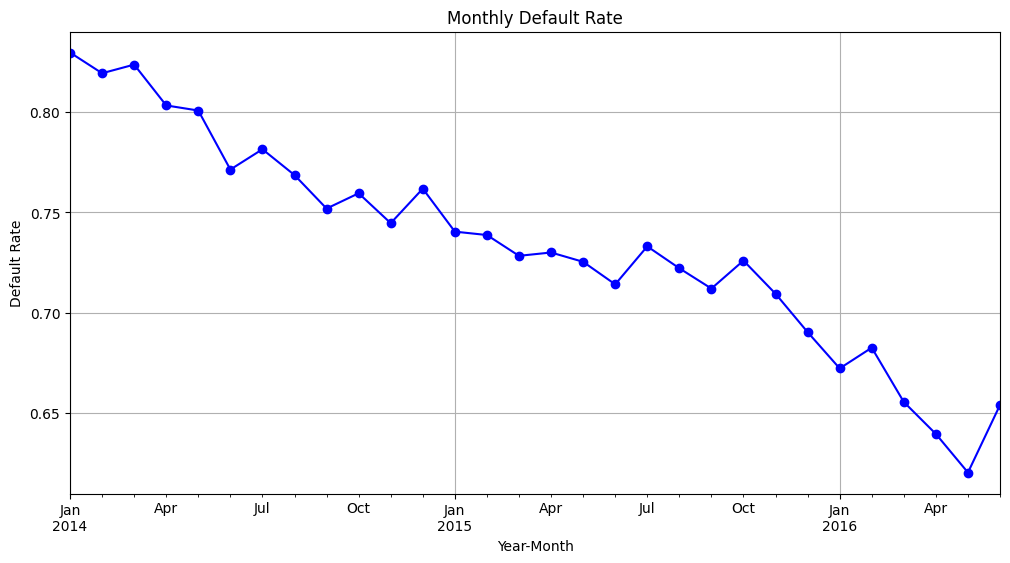

In [22]:

data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['year_month'] = data['transaction_date'].dt.to_period('M')
monthly_default_rate = data.groupby('year_month')['loan_status'].mean()
plt.figure(figsize=(12, 6))
monthly_default_rate.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Default Rate')
plt.xlabel('Year-Month')
plt.ylabel('Default Rate')
plt.grid(True)
plt.show()

In [31]:
import pandas as pd
import numpy as np

def remove_outliers_iqr(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

numerical_columns = [
    "cibil_score",
    "total_no_of_acc",
    "annual_inc",
    "int_rate",
    "loan_amnt",
    "installment",
    "account_bal",
    "emp_length",
]


train_data_cleaned = remove_outliers_iqr(train_data, numerical_columns)
train_data_cleaned.to_excel("cleaned_train_data.xlsx", index=False)


test_data_cleaned = remove_outliers_iqr(test_data, numerical_columns)
test_data_cleaned.to_excel("cleaned_test_data.xlsx", index=False)


print("Train data original shape:", train_data.shape)
print("Train data cleaned shape:", train_data_cleaned.shape)
print("Rows removed from train data:", train_data.shape[0] - train_data_cleaned.shape[0])

print("\nTest data original shape:", test_data.shape)
print("Test data cleaned shape:", test_data_cleaned.shape)
print("Rows removed from test data:", test_data.shape[0] - test_data_cleaned.shape[0])

Train data original shape: (113705, 17)
Train data cleaned shape: (75256, 17)
Rows removed from train data: 38449

Test data original shape: (8455, 17)
Test data cleaned shape: (5424, 17)
Rows removed from test data: 3031
